# CellMap for pancreas endocrine cell data

The tutorial for pancreas endocrine cell data ([Bastidas et al., 2019](https://doi.org/10.1242/dev.173849)).

# Input & preprpcessing

In [1]:
import cellmap
import numpy as np
import scanpy

KeyboardInterrupt: 

The dataset is installed using the [scvelo](https://scvelo.readthedocs.io/en/stable/) package. 

In [ ]:
import scvelo as scv
adata = scv.datasets.pancreas()
adata

AnnData object with n_obs × n_vars = 3696 × 27998
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score'
    var: 'highly_variable_genes'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced'
    obsp: 'distances', 'connectivities'

## Noise reduction by [RECODE](https://github.com/yusuke-imoto-lab/RECODE).

start RECODE for scRNA-seq data
end RECODE for scRNA-seq
log: {'seq_target': 'RNA', '#significant genes': 10602, '#non-significant genes': 7148, '#silent genes': 10248, 'ell': 100, 'Elapsed time': '0h 0m 28s 080ms', 'solver': 'full', '#test_data': 739}


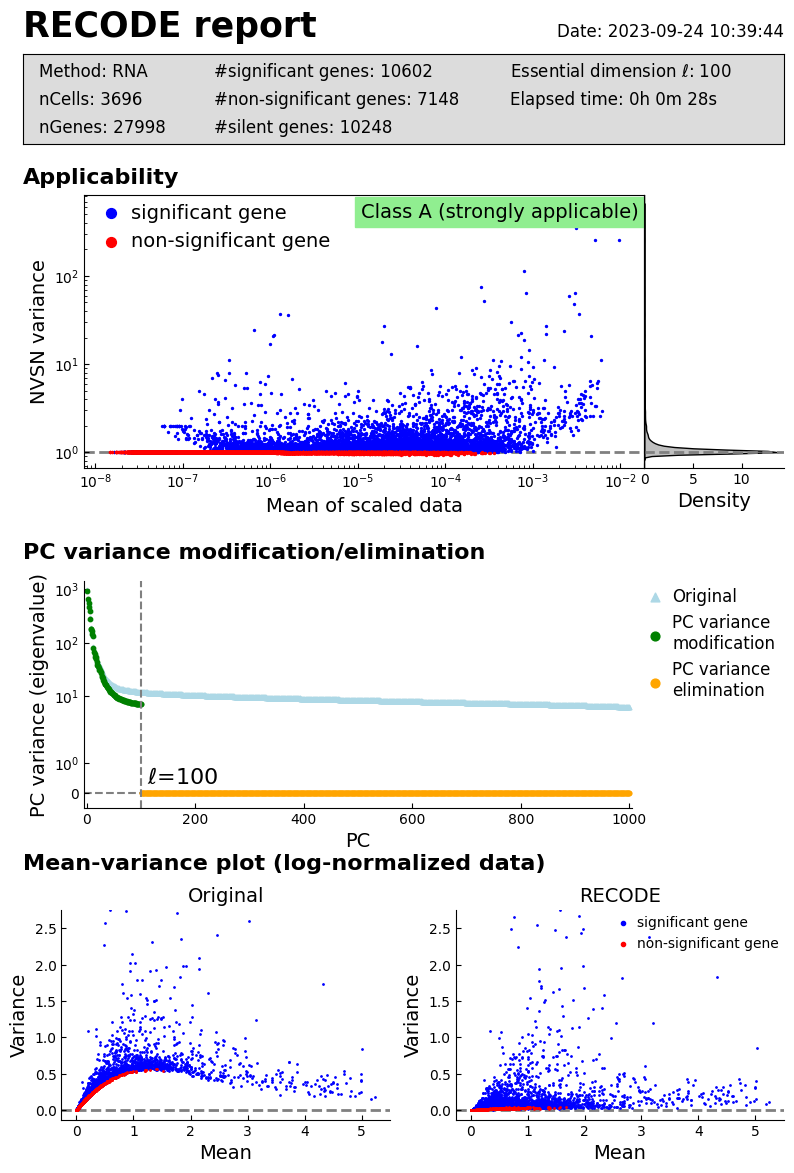

In [ ]:
import screcode
recode = screcode.RECODE()
adata.layers['RECODE'] = recode.fit_transform(adata.X.toarray())
adata.layers['RECODE_log'] = np.log(1e4*adata.layers['RECODE'].T/np.sum(adata.layers['RECODE'],axis=1)+1).T
recode.report()

## Log transformtaion

In [ ]:
scanpy.pp.normalize_total(adata, target_sum=1e4)
scanpy.pp.log1p(adata)

## RNA velocity

In [ ]:
scv.pp.filter_and_normalize(adata)
scv.pp.moments(adata)
scv.tl.velocity(adata,mode='stochastic')
scv.tl.velocity_graph(adata,n_jobs=4)

Normalized count data: spliced, unspliced.
computing neighbors
    finished (0:00:04) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:04) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:14) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 4/8 cores)


  0%|          | 0/3696 [00:00<?, ?cells/s]

    finished (0:01:11) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [ ]:
adata

AnnData object with n_obs × n_vars = 3696 × 27998
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition'
    var: 'highly_variable_genes', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca', 'log1p', 'velocity_params', 'velocity_graph', 'velocity_graph_neg'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced', 'RECODE', 'RECODE_log', 'Ms', 'Mu', 'velocity', 'variance_velocity'
    obsp: 'distances', 'connectivities'

computing velocity embedding
    finished (0:00:01) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


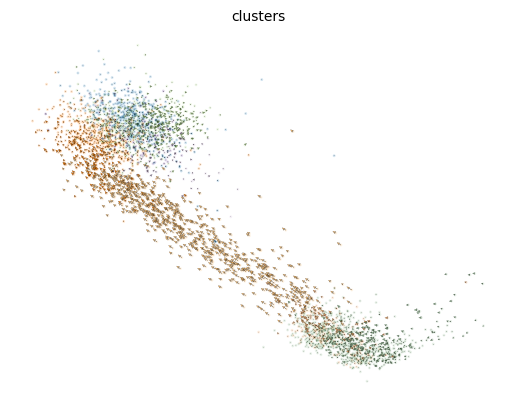

In [ ]:
scv.pl.velocity_embedding_stream(adata,basis="pca")

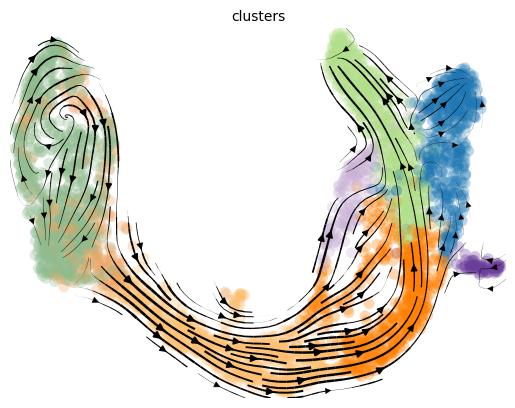

In [ ]:
scv.pl.velocity_embedding_stream(adata,basis="umap")

# Hodge decomposition

In [ ]:
cellmap.Hodge_decomposition(adata)#,graph_method='Delauney'

{'Contribution_ratio': {'Potential': '61.86%', 'Rotation': '38.14%'}}


## View flows

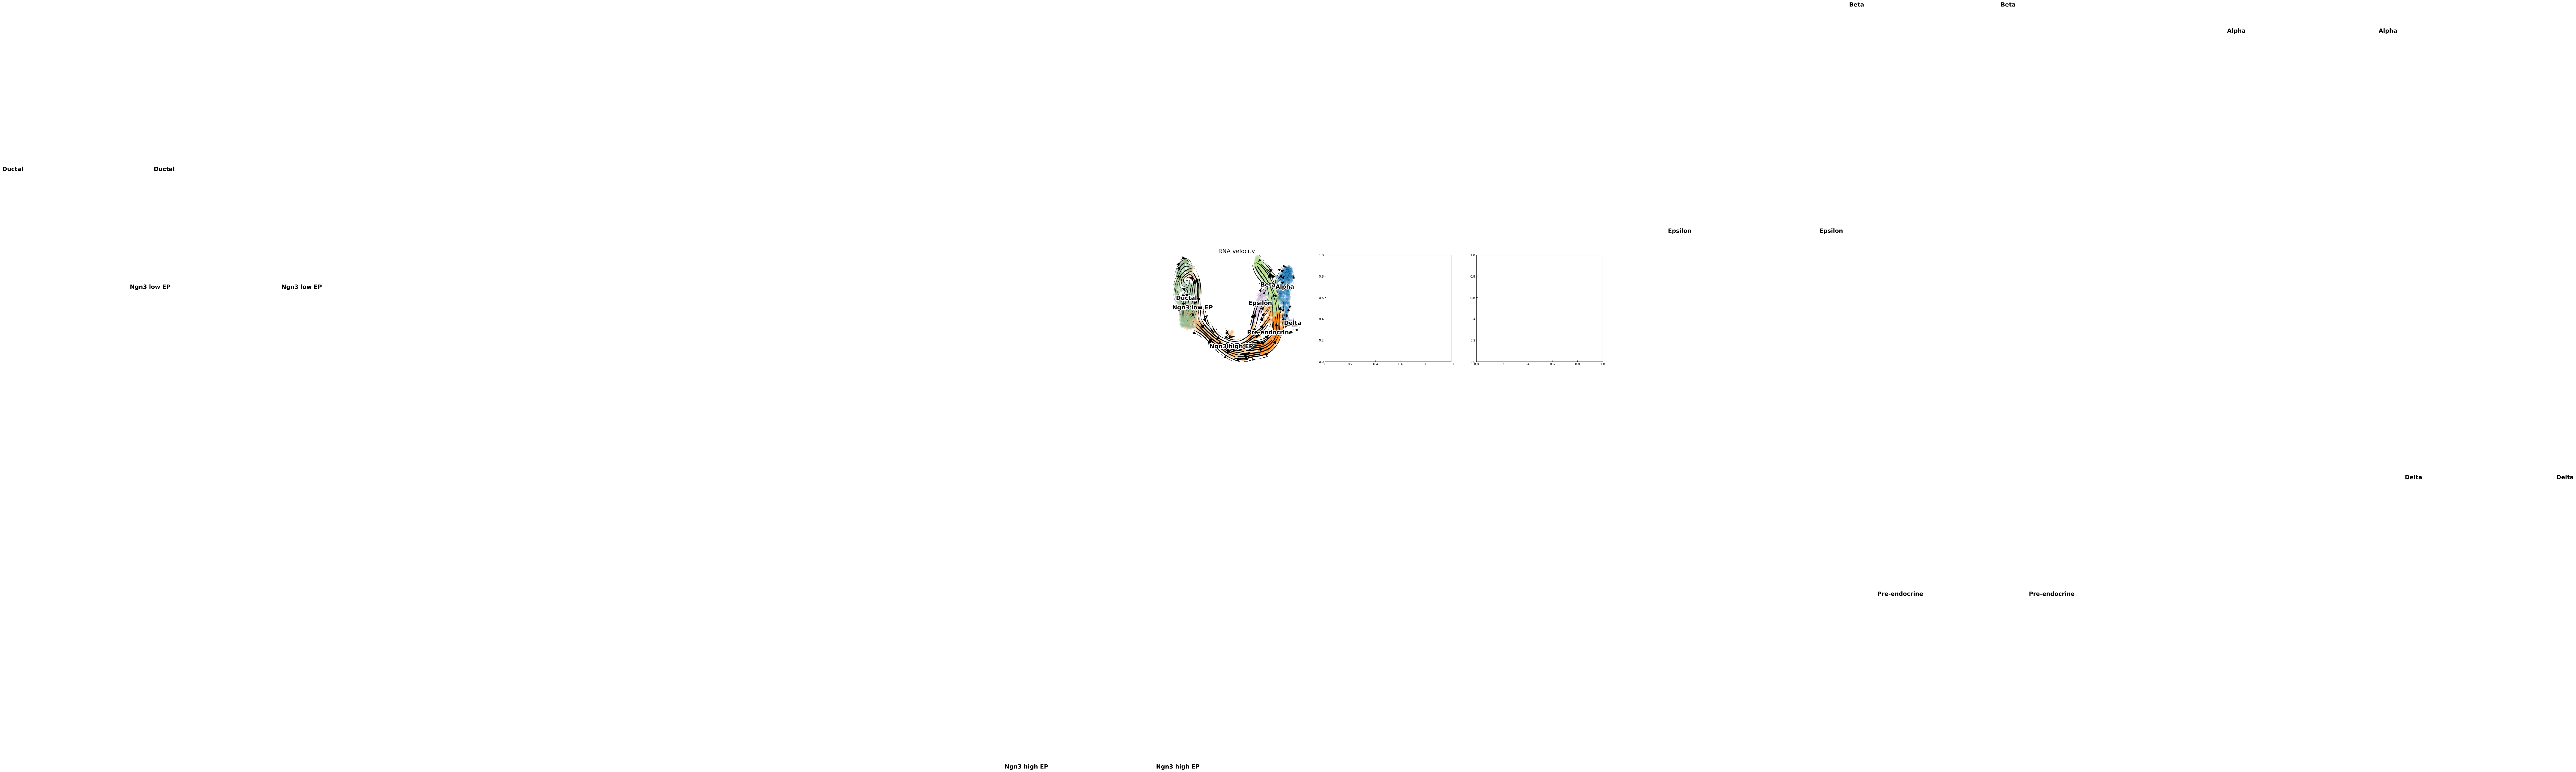

In [ ]:
cellmap.view_stream(adata)

## View orbits

In [ ]:
cellmap.view_stream_line(adata)

## View Hodge potential

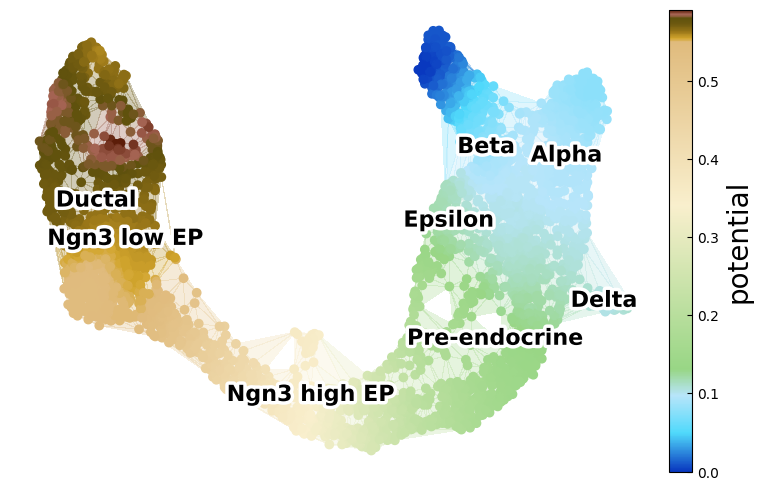

In [ ]:
cellmap.view(adata,show_graph = True,cluster_key = 'clusters')

## View Hodge potential 3D

In [ ]:
cellmap.view_3D(adata,cluster_key ='clusters',elev=50,azim=65)

## Write for [CellMap viewer](https://github.com/yusuke-imoto-lab/CellMapViewer). 

In [ ]:
cellmap.write(adata,filename='CellMap_tutorial_pancreas',exp_key='RECODE_log')

succeeded in writing CellMapp data as "CellMap_tutorial_pancreas.csv"
You can visualize the CDV file by CellMapp viewer https://yusuke-imoto-lab.github.io/CellMapViewer/CellMapViewer/viewer.html


X         Y  Potential     Annotation      Rotation  \
CellID                                                                          
AAACCTGAGAGGGATA   6.143066 -0.063644   0.112602  Pre-endocrine -3.246731e-16   
AAACCTGAGCCTTGAT  -9.906417  0.197778   0.553541         Ductal  9.225231e-16   
AAACCTGAGGCAATTA   7.559791  0.583762   0.103319          Alpha -1.539248e-17   
AAACCTGCATCATCCC -11.283765  4.218998   0.580899         Ductal  6.370420e-17   
AAACCTGGTAAGTGGC   1.721565 -4.753407   0.212295   Ngn3 high EP -1.694453e-16   
...                     ...       ...        ...            ...           ...   
TTTGTCAAGTGACATA   4.768472 -1.388353   0.127546  Pre-endocrine -1.869675e-16   
TTTGTCAAGTGTGGCA  -1.873335 -4.182650   0.325528   Ngn3 high EP  3.128053e-16   
TTTGTCAGTTGTTTGG  -9.882250 -0.105594   0.551294         Ductal  1.820480e-16   
TTTGTCATCGAATGCT   6.612424  4.531895   0.087483          Alpha -1.375314e-15   
TTTGTCATCTGTTTGT   3.071043  1.120432   0.115311        Epsilon -6.397313e-16   

                  Streamline_Original  Streamline_Potential  \
CellID                                                        
AAACCTGAGAGGGATA             5.536823              5.536823   
AAACCTGAGCCTTGAT             7.112372              7.112372   
AAACCTGAGGCAATTA             6.788651              6.788651   
AAACCTGCATCATCCC             7.609415              7.609415   
AAACCTGGTAAGTGGC             5.756151              5.756151   
...                               ...                   ...   
TTTGTCAAGTGACATA             3.733328              3.733328   
TTTGTCAAGTGTGGCA             4.259766              4.259766   
TTTGTCAGTTGTTTGG             6.837525              6.837525   
TTTGTCATCGAATGCT             3.663465              3.663465   
TTTGTCATCTGTTTGT             1.639849              1.639849   

                  Streamline_Rotation  Vorticity_Original  \
CellID                                                      
AAACCTGAGAGGGATA             2.755569           -2.955071   
AAACCTGAGCCTTGAT             4.297711            1.416021   
AAACCTGAGGCAATTA             2.730493            2.136501   
AAACCTGCATCATCCC             6.724659           -1.042772   
AAACCTGGTAAGTGGC             2.332423           -6.977689   
...                               ...                 ...   
TTTGTCAAGTGACATA             0.036530            3.315624   
TTTGTCAAGTGTGGCA             2.156138           -2.290555   
TTTGTCAGTTGTTTGG             3.758448            2.287756   
TTTGTCATCGAATGCT             1.937229            3.947848   
TTTGTCATCTGTTTGT             1.831617           -1.206170   

                  Vorticity_Potential  ...   HVG_Npy  HVG_Krtap17-1  HVG_Gast  \
CellID                                 ...                                      
AAACCTGAGAGGGATA            -2.955071  ...  0.202556       0.815123  0.000000   
AAACCTGAGCCTTGAT             1.416021  ...  0.000000       0.000000  0.487266   
AAACCTGAGGCAATTA             2.136501  ...  0.000000       0.000000  2.267041   
AAACCTGCATCATCCC            -1.042772  ...  0.000000       0.000000  0.000000   
AAACCTGGTAAGTGGC            -6.977689  ...  0.000000       0.000000  0.418264   
...                               ...  ...       ...            ...       ...   
TTTGTCAAGTGACATA             3.315624  ...  0.000000       0.311312  0.116789   
TTTGTCAAGTGTGGCA            -2.290555  ...  0.654389       1.118192  0.000000   
TTTGTCAGTTGTTTGG             2.287756  ...  0.349560       0.000000  0.200447   
TTTGTCATCGAATGCT             3.947848  ...  0.183375       0.351712  2.113241   
TTTGTCATCTGTTTGT            -1.206170  ...  0.000000       0.000000  0.759684   

                   HVG_Ppy  HVG_8430408G22Rik  HVG_Ppp1r1a  HVG_Peg10  \
CellID                                                                  
AAACCTGAGAGGGATA  0.000000           0.000000     0.071403   0.000000   
AAACCTGAGCCTTGAT  1.122035           1.059910     0.338856   0.588133   
AAACCTGAGGCA

# Dynamical analysis

## Single-cell trajectory

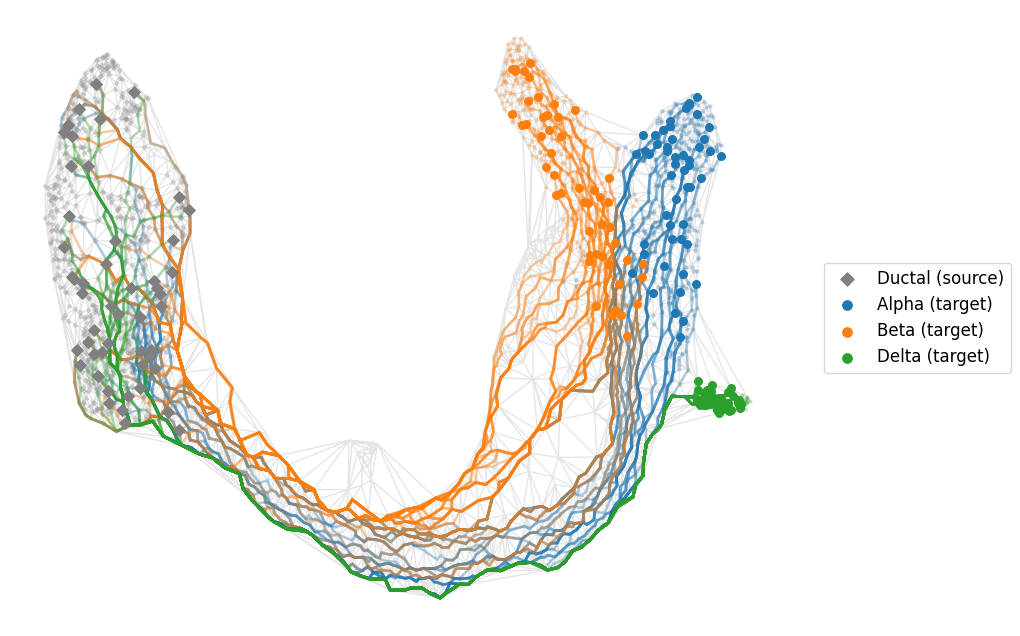

In [ ]:
source_cluster = 'Ductal'
target_clusters = ['Alpha','Beta','Delta']
cellmap.view_trajectory(adata,source_cluster,target_clusters,weight_rate=0.9,graph_method="Delauney")

## Gene expression dynamics

In [ ]:
cellmap.calc_gene_dynamics(adata,source_cluster,target_clusters,exp_key='RECODE_log')

Done the computation of gene dynamics


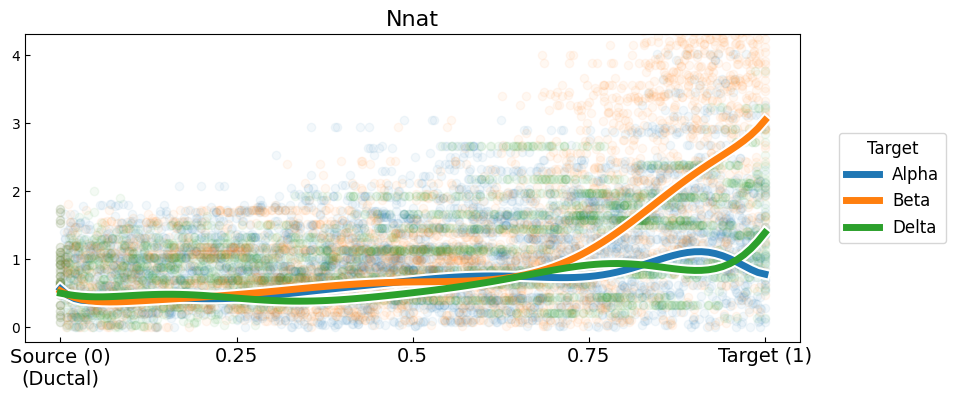

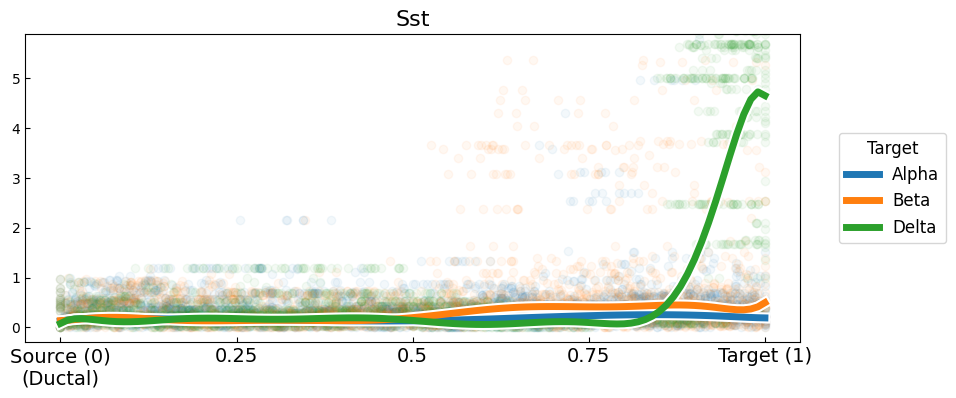

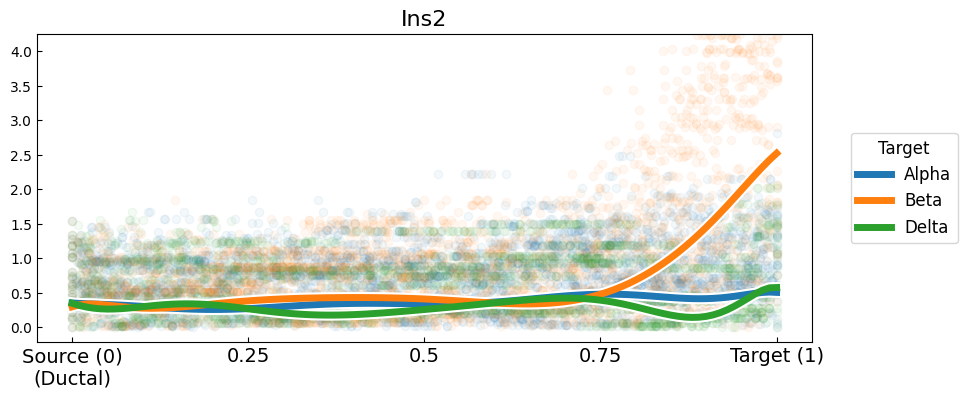

In [ ]:
genes = ['Gcg','Nnat','Sst','Ins2'] 
cellmap.gene_dynamics_plot(adata,source_cluster,target_clusters,genes,exp_key='RECODE_log')

## Bifurcation diagram

In [ ]:
cellmap.bifurcation_diagram(adata,source_cluster,target_clusters)

## DEG dynamics

In [ ]:
cellmap.DEG_dynamics(adata,source_cluster,target_clusters,
                     show=False,save=True,
                     save_dir="output",save_filename="DEG_dynamics_pancreas")


Saving gif animation as output/DEG_dynamics_pancreas_Alpha_Beta.gif...
...computing Alpha vs Beta (1/3) 101/101
Saving gif animation as output/DEG_dynamics_pancreas_Alpha_Delta.gif...
...computing Alpha vs Delta (2/3) 101/101
Saving gif animation as output/DEG_dynamics_pancreas_Beta_Delta.gif...
...computing Beta vs Delta (3/3) 101/101

## Key gene dynamics

Alpha_vs_Beta            Alpha_vs_Delta             Beta_vs_Delta           
           gene Alpha Beta           gene Alpha Delta          gene Beta Delta
1        Tmem27     +    -            Gcg     +     -          Mafb    +     -
2         Romo1     -    +           Irx1     +     -          Rbp4    +     -
3         Spcs2     -    +       BC048546     -     +        Tmem27    -     +
4         Shfm1     -    +         Sphkap     -     +        Immp1l    +     -

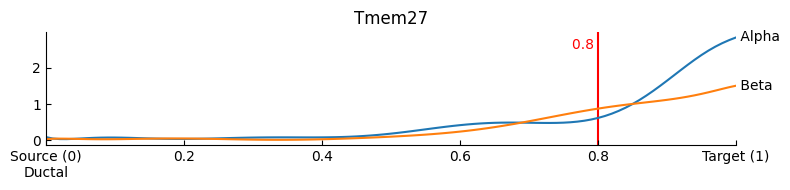

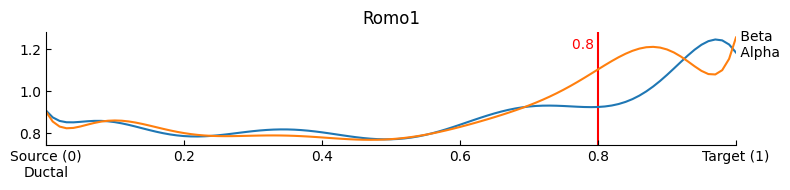

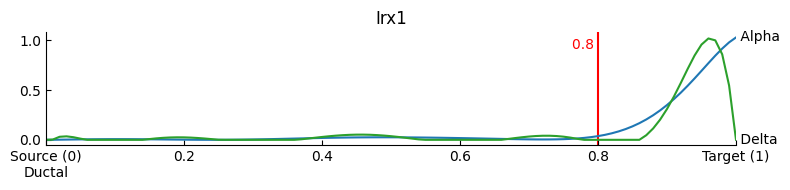

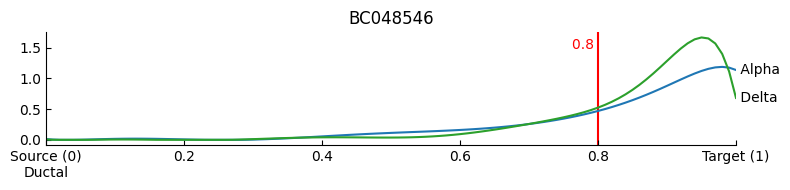

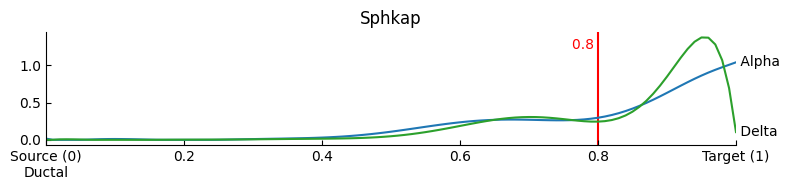

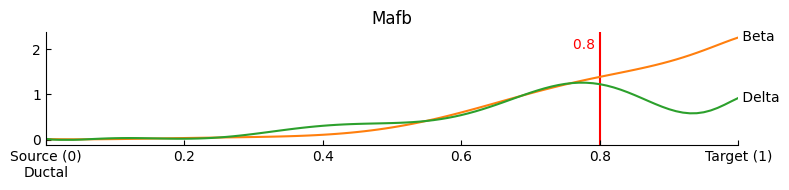

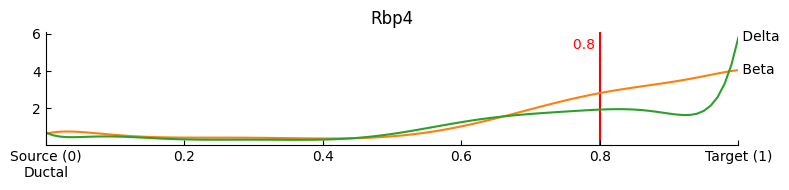

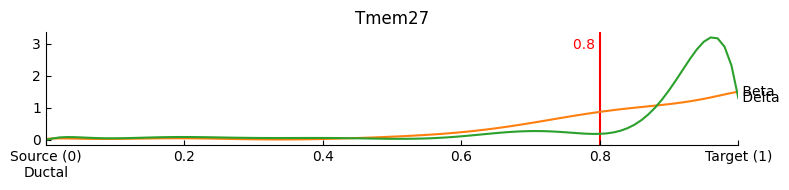

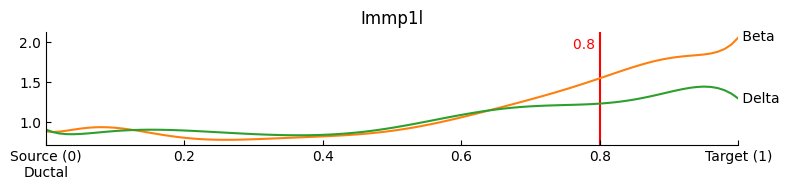

In [ ]:
cellmap.key_gene_dynamics(adata,source_cluster,target_clusters,n_genes=4,time=0.8)

## GRN infernece

In [ ]:
cellmap.calc_GRN(adata,source_cluster,target_clusters,exp_key='RECODE_log')

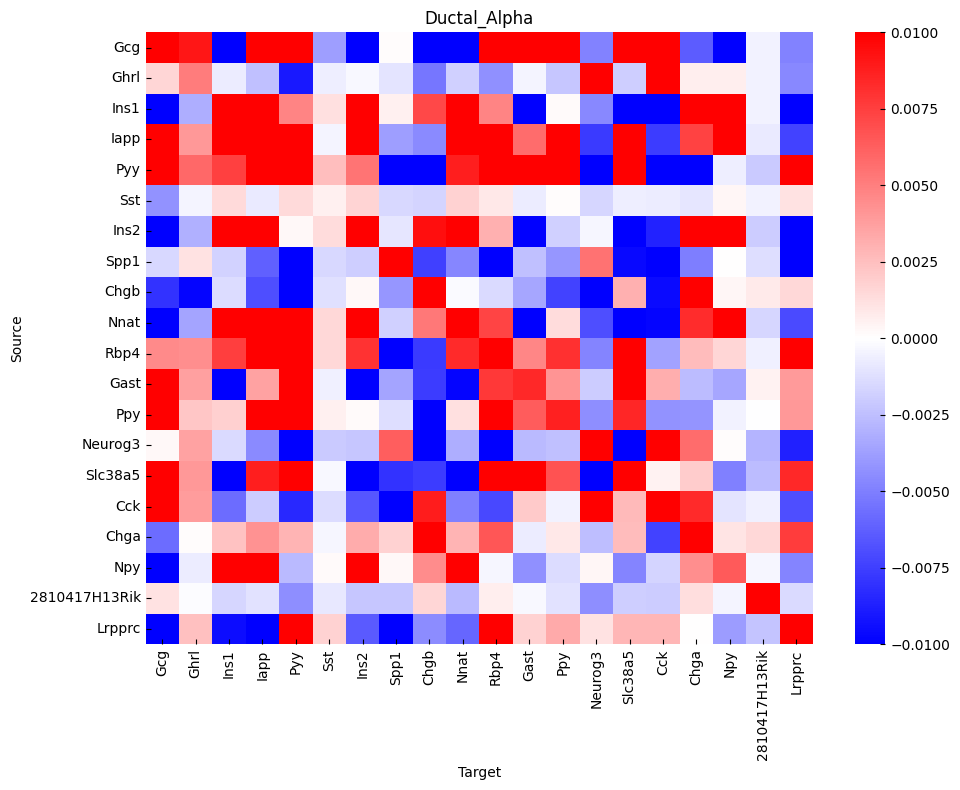

In [ ]:
cellmap.view_GRN(adata,source_cluster,target_clusters,exp_key='RECODE_log')